In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [3]:
df = pd.read_csv("housing.csv")


In [4]:
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].replace('nan', 'unfurnished')
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})

In [5]:
from sklearn.model_selection import train_test_split

# X = all columns except the first (price)
X = df.iloc[:, 1:]

# y = first column (price)
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

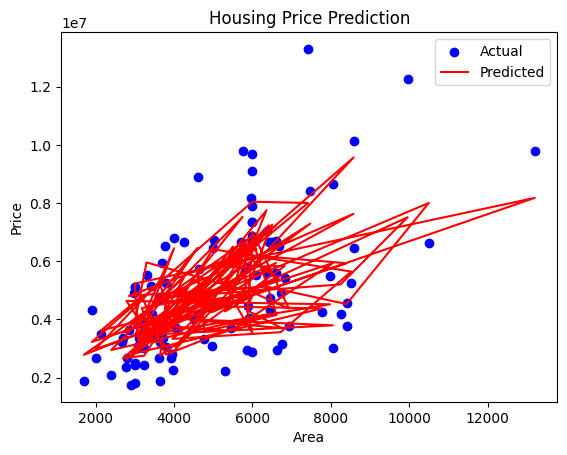

In [8]:
plt.scatter(X_test["area"], y_test, color="blue", label="Actual")
plt.plot(X_test["area"], y_pred, color="red", label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.title("Housing Price Prediction")
plt.show()

In [9]:
y_pred = model.predict(X_test)
print(y_pred[:5])  # Shows first 5 predicted values


[5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782]
